In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [25]:
with open("./logs/2022-09-13-22-26-13.log") as F:
    result = F.read()
result = list(filter(lambda x: "Timestamp" in x, result.split('\n')))
result = list(map(lambda x: x.replace("]","").split(",")[-2:], result))
result = list(
    map(lambda x: (float(x[0]), float(x[1])), result)

)
df = pd.DataFrame(np.array(result), columns=["pred","truth"])

In [26]:
df["pred"].describe()

count    108.000000
mean      -1.531042
std       17.699512
min     -159.878792
25%       -0.034506
50%        0.000195
75%        0.088594
max       50.223227
Name: pred, dtype: float64

<AxesSubplot:>

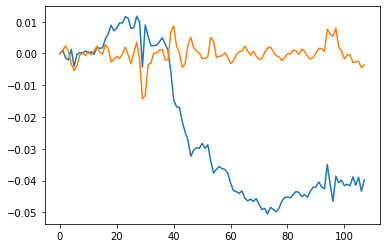

In [27]:
(np.sign(df["pred"]) * df["truth"]).cumsum().plot()
df["truth"].plot()

<AxesSubplot:>

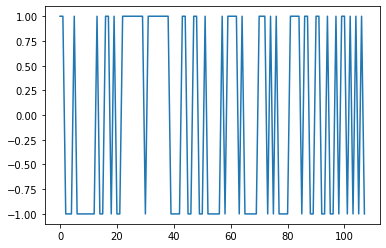

In [28]:
(np.sign(df["pred"])).plot()